In [60]:
import numpy as np
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.preprocessing import PolynomialFeatures
import pylab as pl

In [69]:
x_train = np.array([6, 8, 10, 14, 18]).reshape((-1, 1))
y_train = np.array([7, 9, 13, 17.5, 18]).reshape((-1, 1))
x_test = np.array([6, 8, 11, 16]).reshape((-1, 1))
y_test = np.array([8, 12, 15, 18]).reshape((-1, 1))
x = np.append(x_train, x_test)
y = np.append(y_train, y_test)

The R-squared value of 1-degree training is 0.910002
The R-squared value of 1-degree testing is 0.809727
The R-squared value of 2-degree training is 0.981642
The R-squared value of 2-degree testing is 0.867544
The R-squared value of 4-degree training is 1.000000
The R-squared value of 4-degree testing is 0.809588


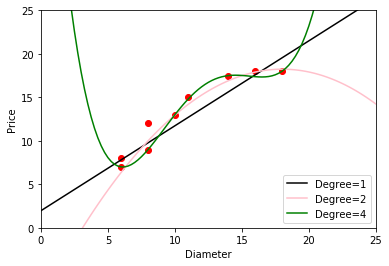

In [59]:
xx = np.linspace(start=0, stop=25, num=101).reshape((-1, 1))
degrees = [1, 2, 4]
cols = ["black", "pink", "green"]
params = list(zip(degrees, cols))
pl.scatter(x, y, c="red")
pl.axis([0, 25, 0, 25])
pl.xlabel("Diameter")
pl.ylabel("Price")

for degree,col in params:
    if degree > 1:
        poly = PolynomialFeatures(degree=degree)
        x_train2 = poly.fit_transform(x_train)
        xx_test = poly.transform(xx)
        x_test2 = poly.transform(x_test)
    else:
        x_train2 = x_train
        x_test2 = x_test
        xx_test = xx
    regressor = LinearRegression()
    regressor.fit(x_train2, y_train)
    fitScore = regressor.score(x_train2, y_train)
    testScore = regressor.score(x_test2, y_test)
    print("The R-squared value of %d-degree training is %f" % (degree, fitScore))
    print("The R-squared value of %d-degree testing is %f" % (degree, testScore))
    yy = regressor.predict(xx_test)
    pl.plt.plot(xx,yy,col,label=("Degree=%d" % degree))
pl.plt.legend()
pl.show()

In [66]:
# Lasso 拟合
poly4 = PolynomialFeatures(degree=4)
x_train_poly4 = poly4.fit_transform(x_train)
x_test_poly4 = poly4.transform(x_test)
xx_test_poly4 = poly4.transform(xx)

lasso_poly4 = Lasso()
lasso_poly4.fit(x_train_poly4, y_train)
print(lasso_poly4.score(x_test_poly4, y_test))
print("the lasso coef is:",lasso_poly4.coef_)

0.83889268736


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


normal
The R-squared value of normal regression training is 1.000000
The R-squared value of normal regression testing is 0.809588
[[  0.00000000e+00  -2.51739583e+01   3.68906250e+00  -2.12760417e-01
    4.29687500e-03]]
****************************************
Lasso
The R-squared value of Lasso regression training is 0.994083
The R-squared value of Lasso regression testing is 0.838893
[  0.00000000e+00   0.00000000e+00   1.17900534e-01   5.42646770e-05
  -2.23027128e-04]
****************************************
Ridge
The R-squared value of Ridge regression training is 0.994162
The R-squared value of Ridge regression testing is 0.837420
[[ 0.         -0.00492536  0.12439632 -0.00046471 -0.00021205]]
****************************************


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


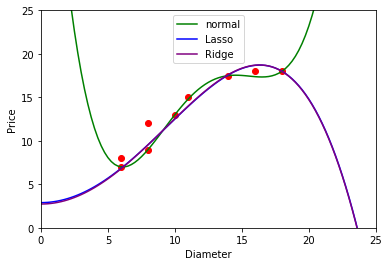

In [76]:
xx = np.linspace(start=0, stop=25, num=101).reshape((-1, 1))
poly4 = PolynomialFeatures(degree=4)
x_train_poly4 = poly4.fit_transform(x_train)
x_test_poly4 = poly4.transform(x_test)
xx_test = poly4.transform(xx)
methods = ["normal", "Lasso", "Ridge"]
cols = ["green", "blue", "purple"]
params = list(zip(methods, cols))
pl.scatter(x, y, c="red")
pl.axis([0, 25, 0, 25])
pl.xlabel("Diameter")
pl.ylabel("Price")

for method, col in params:
    obj = LinearRegression() if method == "normal" else eval(method + "()")
    obj.fit(x_train_poly4, y_train)
    fitScore = obj.score(x_train_poly4, y_train)
    testScore = obj.score(x_test_poly4, y_test)
    yy = obj.predict(xx_test)
    print(method)
    print("The R-squared value of %s regression training is %f" % (method, fitScore))
    print("The R-squared value of %s regression testing is %f" % (method, testScore))
    print(obj.coef_)
    print("****************************************")
    pl.plt.plot(xx,yy,col,label=method)
pl.plt.legend()
pl.show()
